In [5]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [6]:
from fastbook import *

In [7]:
import pandas as pd
import numpy as np

# Loading Data

In [11]:
def get_dls(bs, size, folder):
    dls = ImageDataLoaders.from_folder(path = folder,
                                      valid_pct = 0.2,
                                      seed = 1991,
                                      item_tfms = Resize(size),
                                      batch_tfms = aug_transforms(),
                                      bs = bs)
    return dls

In [12]:
dls = get_dls(64, 448, "data/train_sample")

# Exploring Data

In [13]:
dls.vocab

(#5) ['DOL','LAG','NoF','OTHER','SHARK']

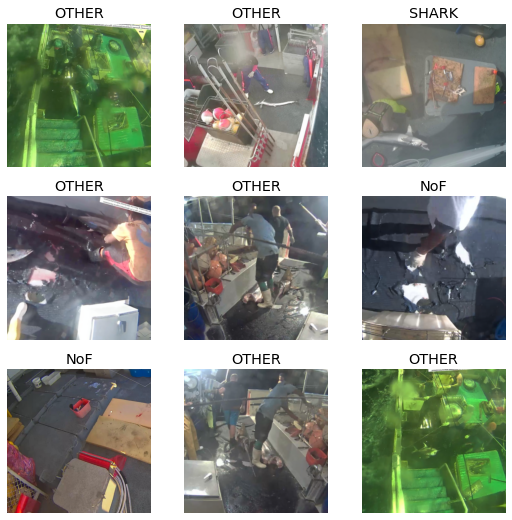

In [14]:
dls.show_batch()

In [15]:
amounts = {}

In [16]:
for item in dls.train_ds:
    category_number = int(item[1])
    category_name = dls.vocab[category_number]
    amounts[category_name] = amounts.get(category_name, 0) + 1

In [17]:
amounts

{'NoF': 380, 'OTHER': 239, 'DOL': 98, 'SHARK': 129, 'LAG': 54}

In [25]:
shapes = [img[0].shape for img in dls.train_ds]

In [26]:
shapes

[(720, 1280),
 (718, 1276),
 (974, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (750, 1280),
 (750, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (750, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (974, 1280),
 (854, 1518),
 (974, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (750, 1280),
 (974, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (718, 1276),
 (720, 1280),
 (974, 1732),
 (720, 1280),
 (720, 1280),
 (750, 1334),
 (720, 1280),
 (750, 1334),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (670, 1192),
 (718, 1276),
 (720, 1280),
 (720, 1280),
 (750, 1280),
 (750, 1280),
 (720, 1280),
 (718, 1276),
 (718, 1276),
 (720, 1280),
 (750, 1280),
 (750, 1280),
 (974, 1280),
 (720, 1280),
 (718, 1276),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (750, 1334),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (670,

In [30]:
pd.Series(shapes).value_counts()

(720, 1280)    553
(750, 1280)    104
(974, 1280)     77
(718, 1276)     77
(750, 1334)     26
(974, 1732)     24
(670, 1192)     19
(700, 1244)     12
(854, 1518)      8
dtype: int64

# Loss function

In [ ]:
sigmoid = 

In [3]:
logs = {num : np.log(num) for num in np.linspace(1, 0, 100, endpoint = False)}

{1.0: 0.0,
 0.99: -0.01005033585350145,
 0.98: -0.020202707317519466,
 0.97: -0.030459207484708574,
 0.96: -0.040821994520255166,
 0.95: -0.05129329438755058,
 0.94: -0.06187540371808753,
 0.9299999999999999: -0.0725706928348355,
 0.92: -0.08338160893905101,
 0.91: -0.09431067947124129,
 0.9: -0.10536051565782628,
 0.89: -0.11653381625595151,
 0.88: -0.12783337150988489,
 0.87: -0.13926206733350766,
 0.86: -0.15082288973458366,
 0.85: -0.16251892949777494,
 0.84: -0.1743533871447778,
 0.83: -0.18632957819149348,
 0.8200000000000001: -0.19845093872383818,
 0.81: -0.21072103131565253,
 0.8: -0.2231435513142097,
 0.79: -0.23572233352106983,
 0.78: -0.2484613592984996,
 0.77: -0.2613647641344075,
 0.76: -0.2744368457017603,
 0.75: -0.2876820724517809,
 0.74: -0.3011050927839216,
 0.73: -0.31471074483970024,
 0.72: -0.3285040669720361,
 0.71: -0.342490308946776,
 0.7: -0.35667494393873245,
 0.69: -0.37106368139083207,
 0.6799999999999999: -0.3856624808119848,
 0.6699999999999999: -0.4004775

In [38]:
tensor([5.0]).sigmoid()

tensor([0.9933])

In [39]:
output = tensor([[0.99, 0.01], [0.99, -4]])
target = tensor([0, 1])

tensor([[0.7291, 0.5025],
        [0.7291, 0.5025]])

In [ ]:
nn.log_softmax

In [40]:
nn.CrossEntropyLoss(reduction='none')(output, target)

tensor([0.3187, 4.9968])

In [26]:
np.log(0.01)

-4.605170185988091

In [29]:
nn.NLLLoss(reduction='none')(output, target)

tensor([-0.9900, -0.0100])

In [13]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [12]:
torch.randn(4,5)

tensor([[-0.8371, -0.9224,  1.8113,  0.1606,  0.1971],
        [-1.1441,  0.3383,  1.6992,  0.0109, -0.3387],
        [-1.3407, -0.5854, -0.5644,  1.0563, -1.4692],
        [ 1.4332,  0.7440, -0.4816, -1.0495,  0.6039]])

In [18]:
torch.randint(0, 2, (4,5))

tensor([[1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1],
        [1, 1, 0, 0, 0]])

In [19]:
F.binary_cross_entropy_with_logits(b, a.float(), reduction='none')

tensor([1.3060, 0.6882])